# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

*Name* — название игры

*Platform* — платформа

*Year_of_Release* — год выпуска

*Genre* — жанр игры

*NA_sales* — продажи в Северной Америке (миллионы проданных копий)

*EU_sales* — продажи в Европе (миллионы проданных копий)

*JP_sales* — продажи в Японии (миллионы проданных копий)

*Other_sales* — продажи в других странах (миллионы проданных копий)

*Critic_Score* — оценка критиков (максимум 100)

*User_Score* — оценка пользователей (максимум 10)

*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Чтение данных

In [88]:
#импортируем библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats as st

In [89]:
#сохраним датасет в переменную
data = pd.read_csv('/Users/denisslobodyanyuk/Desktop/датасеты яндекса/games.csv')

In [90]:
#построим функции для графиков 
def histplot(data, column, bins):
    fig = px.histogram(data, x=column, nbins =bins, title=f'Histogam of {column}')
    return fig 

def pieplt(data, column, title):
    labels = data[column].value_counts().index
    values = data[column].value_counts().values
    fig = px.pie(values=values, names=labels, title=title)
    fig.show()
    
def to_int(data, column):
    data[column] = data[column].astype('int64', errors='ignore')
    
def to_float(data, column):
    data[column] = data[column].astype('float64')
    
def fill_median(data, column):
    data[column] = data[column].fillna(data[column].median())
    
def fill_mean(data, column):
    data[column] = data[column].fillna(data[column].mean())

## Подготовка данных

In [91]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [93]:
#приведём столбцы к нижнему регистру 
data.columns = data.columns.str.lower()

#удалим пропуски
data = data.dropna(subset=['year_of_release', 'genre', 'name'])

In [94]:
#заменим tbd на значение из critic_store делённое на 10
data = data.replace({'user_score':{'tbd':data['critic_score'] / 10}})

In [95]:
#приведеём столбец к челочисленному типу
to_int(data, ['year_of_release', 'critic_score'])
to_float(data, 'user_score')

In [96]:
data.head()#промежуточно выводим первые 5 строк 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [97]:
#посчитаем суммарные продажи 
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

#### Вывод:

1. Столбцам присвоили нижний регистр



2. Исправил нужные типы данных 


3. Значения 'tbd' я заменил на результат из столбца `critic_score` делённый на 10 


4. Добавил столбец с суммарными продажами 


5. В столбце `user_score` довольно большое количество пропусков и неизвестна причина их появления, поэтому оставляю как есть


6. У пропусков в столбцах рейтингов точно неизвестна, но могу предположить, что это из-за того, что рейтинг выставляет Американское агенство, ведь вполне возможно, что не все игры и платформы достигли Америки(некоторые, возможно, продавались только в Японии или где-то ещё)

## Исследовательский анализ данных 

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


4. Не учитывайте в работе данные за предыдущие годы.


5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


8. Соотнесите выводы с продажами игр на других платформах.


9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [98]:
#сгруппируем данные по году 
games_per_year = data.groupby('year_of_release')\
                     .agg({'name': 'count'})\
                     .reset_index()\
                     .rename(columns={'name': 'number_of_games'})

#строим линейный график зависимости количества игр от года
games_per_year_line = px.line(games_per_year, x='year_of_release', y='number_of_games', title='Number of game').show()

#### Вывод:

По всем периодам данные не важны, так как с 1980 по 1993 годы существовало мало компаний и выпускалось очень мало игр. Затем с 1993 начинается плавный рост количества выпускаемых игр, самый пик  в 2007 году - `1466` выпущенных игр

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [99]:
#сгруппируем данные по продажам на каждой платформе
sales_per_platform = data.groupby(['platform'])\
                         .agg({'total_sales': 'sum'})\
                         .rename(columns={'total_sales': 'number_of_sales'})\
                         .sort_values(by='number_of_sales', ascending=False).reset_index()                                                                                                    

In [100]:
#выберем топ 5 продаваемых платформ 
best_sold_platforms = sales_per_platform.loc[0:4, :]
best_sold_platforms

,platform,number_of_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


In [101]:
#сделаем выборки для этих платформ 
ps_2 = data.query('platform == "PS2"')
x_360 = data.query('platform == "X360"')
ps_3 = data.query('platform == "PS3"')
wii = data.query('platform == "Wii"')
ds = data.query('platform == "DS"')

#### ps2

In [102]:
#теперь для каждой платформы построим распределение по годам 
ps_2_group = ps_2.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index()

#построим гистограмму
ps_2_hist = px.histogram(ps_2_group, x='year_of_release', y='total_sales', nbins = 100, title='Histogram of sales ps2 per year').show()

# построим линейный график
ps_2_line = px.line(ps_2_group, x='year_of_release', y='total_sales', title='Line of sales ps2 per year').show()


#### Вывод: 

В 2004 и 2002 годах PS2  продвалась больше всего. После 2004 пошел плавный спад продаж 

####  x360

In [103]:
#сгруппируем данные для xbox 360
x_360_group = x_360.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index()

#гистограмма
x_360_hist = px.histogram(x_360_group, x='year_of_release', y='total_sales', nbins = 100, title='Histogram of sales x360 per year').show()

#линейный график
x_360_line = px.line(x_360_group, x='year_of_release', y='total_sales', title='Line of sales x360 per year').show()

####  Вывод: 

 Самый пик продаж x360 было в 2010 году. Плавный рост наблюдается по 2008 год, а после 2010 происходит спад

#### ps_3

In [104]:
#группировка данных для ps 3
ps_3_group = ps_3.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index()

# гистограмма 
ps_3_hist = px.histogram(ps_3_group, x='year_of_release', y='total_sales', nbins = 100, title='Histogram of sales ps3 per year').show()

# линейный график
ps_3_line = px.line(ps_3_group, x='year_of_release', y='total_sales', title='Line of sales ps3 per year').show()

####  Вывод: 

 Пик продаж - 2011 год. Затем происходит спад с небольшим ростом с 2012 по 2013

#### Wii

In [105]:
# группировка данных для wii
wii_group = wii.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index()

#гистограмма 
wii_hist = px.histogram(wii_group, x='year_of_release', y='total_sales', nbins = 100, title='Histogram of sales wii per year').show()

# линейный график
wii_line = px.line(wii_group, x='year_of_release', y='total_sales', title='Line of sales wii per year').show()

#### Вывод:

 Плавный и стабильный рост происходит до пика продаж в 2009 году. После 2009 года продажи начали уменьшаться 

#### DS

In [106]:
#сводная таблица для ds
ds_group = ds.groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index()

# гистограмма
ds_hist = px.histogram(ds_group, x='year_of_release', y='total_sales', nbins = 100, title='Histogram of sales ds per year').show()

# график 
ds_line = px.line(ds_group, x='year_of_release', y='total_sales', title='Line of sales ds per year').show()

#### Вывод:

Продажи этой платформы начались только в 2004 году. Продажи платформы начались довольно хорошо, в 2007 году был пик продаж

### вывод: 

Для платформ, которые пользуются популярностью, срок использования равен 8-12 лет. Можно проследить, как менялись поколения для приствок PlayStation:

PS 1994-2003


PS2 2000-2011


PS3 2006-2016


PS4 2013-по сегодняшний день

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальный период - **2013-2016 год**

In [107]:
#составим выборку
actual_period = data.query('year_of_release >= 2013')
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [108]:
# сводная таблица по платформам
lead_platforms =pd.pivot_table(actual_period, index=['platform','year_of_release'], 
                                     values='total_sales', aggfunc = 'sum').reset_index()

In [109]:
fig = px.line(lead_platforms, x='year_of_release', y='total_sales', color='platform', title="Platforms sales by year").show()

#### Вывод:

Мы сразу видим компанию, лидирующую по продажам - `PS4`

Спад продаж происходит у X360, WiiU, PS3. По моему мнению потенциально прибыльные платформы - `PS4, XOne, 3DS`.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [110]:
#создадим датафрейм с потенциально прибыльными платформами 
current_platforms = ['PS4', 'XOne', '3DS']
data_current_platforms = actual_period.query('platform in @current_platforms')

data_current_platforms.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,942.0,2014.818471,1.023610,2013.00,2014.00,2015.000,2016.0000,2016.00
na_sales,942.0,0.254841,0.578818,0.00,0.00,0.040,0.2200,6.03
eu_sales,942.0,0.237410,0.605987,0.00,0.00,0.040,0.1875,6.31
jp_sales,942.0,0.089289,0.337464,0.00,0.00,0.010,0.0600,4.35
other_sales,942.0,0.073142,0.182421,0.00,0.00,0.010,0.0500,2.38
critic_score,492.0,71.973577,12.809958,19.00,65.00,74.000,81.0000,97.00
user_score,528.0,6.691667,1.447502,1.50,6.00,6.900,7.8000,9.20
total_sales,942.0,0.654682,1.410325,0.01,0.05,0.155,0.5775,14.63


In [111]:
fig = px.box(data_current_platforms, x='platform', y='total_sales', color='platform', title='Boxplot of different platforms').show()

(0.0, 2.0)

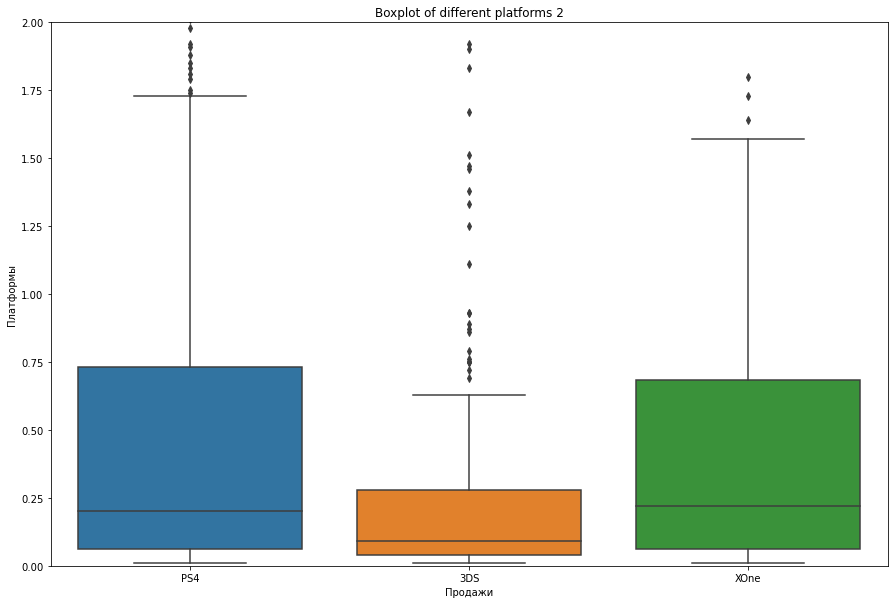

In [112]:
#строим ещё один боксплот
plt.figure(figsize=(15,10))
sns.boxplot(data=data_current_platforms, x='platform', y='total_sales')
plt.title(label='Boxplot of different platforms 2')
plt.xlabel('Продажи')
plt.ylabel('Платформы')
plt.ylim(0,2)

#### Вывод:

За 2013-2016 год выбрали три самые потенциальные платформы: `PS4, 3DS, XOne`


У PS4 и XOne третьи квартили почти одинаковые. Медианное значение самое маленькое у 3DS. Также видны все выбросы у каждой платформы

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [113]:
ps_4 = actual_period[actual_period['platform'] == 'PS4']

In [114]:
ps_4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


<AxesSubplot:>

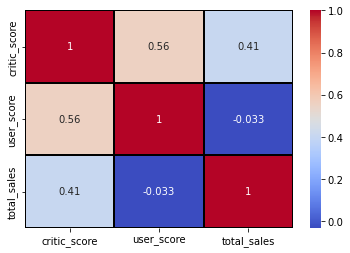

In [115]:
ps_4_unique = ps_4.loc[:,['critic_score', 'user_score', 'total_sales']]
sns.heatmap(ps_4_unique.corr(), annot=True, cmap='coolwarm', linewidth=2, linecolor='black')

In [116]:
#построим диаграммы рассеивания 
fig = px.scatter(ps_4_unique, x='user_score', y='total_sales', title='Dependence sales on user score').show()

fig = px.scatter(ps_4_unique, x='critic_score', y='total_sales', title='Dependence sales on critic score').show()

#### Вывод:

Исходя из данных, можно сказать, что у оценки критиков есть прямая средняя зависимость с продажами. А оценки пользователей никакой корреляции с продажами не имеют

### Соотнесите выводы с продажами игр на других платформах.

#### для XOne 

In [117]:
Xone = actual_period[actual_period['platform'] == 'XOne']

<AxesSubplot:>

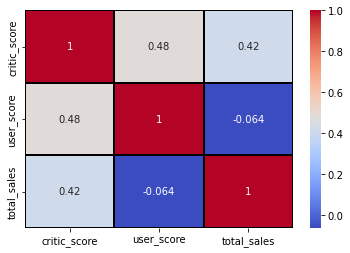

In [118]:
#создадим датасет для  XOne
Xone_unique = Xone.loc[:,['critic_score', 'user_score', 'total_sales']]
sns.heatmap(Xone_unique.corr(), annot=True, cmap='coolwarm', linewidth=2, linecolor='black')

In [119]:
fig = px.scatter(Xone_unique, x='user_score', y='total_sales', title='Dependence sales on user score').show()

fig = px.scatter(Xone_unique, x='critic_score', y='total_sales', title='Dependence sales on critic score').show()

#### Вывод:

Продажа игр платформы  XOne почти также зависит от оценок критиков. И также очень слабая зависимость от оценок пользователей

#### для 3DS

In [120]:
ds_3 = actual_period[actual_period['platform'] == '3DS']

<AxesSubplot:>

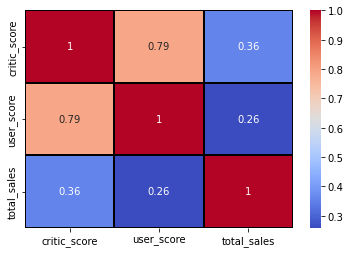

In [121]:
#создадим датафрейм для 3ds
ds_3_unique = ds_3.loc[:,['critic_score', 'user_score', 'total_sales']]
sns.heatmap(ds_3_unique.corr(), annot=True, cmap='coolwarm', linewidth=2, linecolor='black')

In [122]:
fig = px.scatter(Xone_unique, x='user_score', y='total_sales', title='Dependence sales on user score').show()

fig = px.scatter(Xone_unique, x='critic_score', y='total_sales', title='Dependence sales on critic score').show()

#### Вывод:

У плтаформы Xone наблюдается слабая зависимость от обеих оценок.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [123]:
#сгруппируем данные по жанрам 
genre_sales = actual_period.groupby('genre')\
                           .agg({'total_sales': 'median'})\
                           .reset_index()
genre_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


In [124]:
#построим гистограмму 
fig = px.histogram(genre_sales, x='genre', y='total_sales', color='genre', title='Sales by genre').show()

### Вывод:

1. Самые популярные жанры: `шутеры и спортивные игры`


2. Самые непопулярные жанры: `стратегии, пазлы и приключения`

## составьте портрет каждого региона

Определите для пользователя каждого региона (NA, EU, JP):


1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.


2. Самые популярные жанры (топ-5). Поясните разницу.


3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [125]:
# составим выборки для каждого региона
na_data = actual_period.query('na_sales > 0')
na_data['rating'] = na_data['rating'].fillna('No Rate')


jp_data = actual_period.query('jp_sales > 0')
jp_data['rating'] = jp_data['rating'].fillna('No Rate')


eu_data = actual_period.query('eu_sales > 0')
eu_data['rating'] = eu_data['rating'].fillna('No Rate')

/var/folders/1x/039_dcnj3xvbq1pnwlkr31_m0000gn/T/ipykernel_56812/1358541861.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1x/039_dcnj3xvbq1pnwlkr31_m0000gn/T/ipykernel_56812/1358541861.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1x/039_dcnj3xvbq1pnwlkr31_m0000gn/T/ipykernel_56812/1358541861.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [126]:
#сделаем сводную таблицу из топ 5 платформ
def top_5_platforms(df, column):
    top = data.groupby('platform')\
             .agg({column: 'sum'})\
             .sort_values(by=column, ascending=False)\
             .reset_index().loc[:4]
    return top

#сделаем сводную таблицу из топ 5 жанров
def top_5_genres(df, column):
    top = data.groupby('genre')\
             .agg({column: 'sum'})\
             .sort_values(by=column, ascending=False)\
             .reset_index().loc[:4]
    return top

In [127]:
#отдельные графики для показания отношений 
def pie_platforms(df, column, title):
    fig = px.pie(df, values=column, names='platform', title=title).show()
    
def pie_genres(df, column, title):
    fig = px.pie(df, values=column, names='genre', title=title).show()

In [128]:
#и функция для создания сводной таюлицы по рейтингу
def rating(df, column):
    rate = df.groupby('rating')\
             .agg({column: 'sum'})\
             .sort_values(by=column, ascending=False)
    return rate

####  Europe

In [129]:
# топ 5 платформ
top_5_eu = top_5_platforms(eu_data, 'eu_sales')
top_5_eu

,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39


In [130]:
pie_platforms(top_5_eu, 'eu_sales', "Sales by platform in Europe")

In [131]:
# топ жанров в европе
top_genres_eu = top_5_genres(eu_data, 'eu_sales')
top_genres_eu

,genre,eu_sales
0,Action,510.99
1,Sports,371.33
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60


In [132]:
pie_genres(top_genres_eu, 'eu_sales', 'Sales by genre in Europe')

In [133]:
# сводная таблица по рейтингу
rating(eu_data, 'eu_sales')

,eu_sales
rating,
M,145.32
E,83.36
No Rate,78.91
E10+,42.69
T,41.95


####   Вывод:

1. Топ 5 платформ в Европе: `PS2, PS3, X360, Wii, PS`


2. Топ 5 жанров в Европе: `экшн, спорт, шутеры, гонки и другое`


3. Рейтинг влияет на продажи в Европе, платформы с рейтином `M` продается больше всего 

####  Japan

In [134]:
# топ 5 платформ в японии
top_5_jp = top_5_platforms(jp_data, 'jp_sales')
top_5_jp

,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


In [135]:
pie_platforms(top_5_jp, 'jp_sales', 'Sales by platform in Japan')

In [136]:
# жанры в японии
top_genres_jp = top_5_genres(jp_data, 'jp_sales')
top_genres_jp

,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.14
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02


In [137]:
pie_genres(top_genres_jp, 'jp_sales', 'Sales by genre in Japan')

In [138]:
# рейтинг в японии
rating(jp_data, 'jp_sales')

,jp_sales
rating,
No Rate,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


####   Вывод:

1. Топ 5 платформ в Японии: `PS2, DS, SNES, 3DS, PS`


2. Топ 5 жанров в Японии: `экшн, спорт, ролевые игры, платформы и другое`


3. Рейтинг влияет на продажи в Японии, платформы, у которых не выставлен рейтинг, пользуются большис спросом 

####  North America

In [139]:
# топ 5 платформ в северной америке
top_5_na = top_5_platforms(na_data, 'na_sales')
top_5_na

,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31


In [140]:
pie_platforms(top_5_na, 'na_sales', 'Sales by platform in North America')

In [141]:
#топ жанров в америке
top_genres_na = top_5_genres(na_data, 'na_sales')
top_genres_na

,genre,na_sales
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57


In [142]:
pie_genres(top_genres_na, 'na_sales', 'Sales by genre in North America')

In [143]:
#рейтинг 
rating(na_data, 'na_sales')

,na_sales
rating,
M,165.21
No Rate,89.42
E,79.05
E10+,54.24
T,49.79


####   Вывод:

1. Топ 5 платформ в  северной Америке: `PS2, PS3, X360, Wii, ВS`

2. Топ 5 жанров в  Севреной Америке: `экшн, спорт, шутеры, платформы и другое`

3. Рейтинг влияет на продажи в Европе, платформы с рейтином `M` продается больше всего. Затем идут платформы без рейтинга

## Проверка гипотез 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC различны 

**Альтернативная гипотеза:** средние пользовательските рейтинги платформ  Xbox One и PC одинаковые 


Пороговое значение: *a=5%*

In [144]:
#создадим выборки для платформ
xbox = actual_period.query('platform == "XOne"')
pc = actual_period.query('platform == "PC"')


# посчитаем дисперсию, среднее и стандартное отклонение 
both_data = actual_period.query('platform == ["XOne", "PC"]')
df = both_data.groupby('platform').agg({'user_score': ['mean', 'var', 'std']}).round(2)
df

user_score            
               mean   var   std
platform                       
PC             6.27  3.04  1.74
XOne           6.51  1.90  1.38

In [145]:
#используем ttest 
alpha = 0.05

results = st.ttest_ind(xbox['user_score'], pc['user_score'], equal_var=False, nan_policy="omit")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Есть основания отвергнуть нулевую гипотезу')
else: 
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 0.1601617155306426
Нет оснований отвергнуть нулевую гипотезу


### Вывод:

Используя вывод ttest, мы можем предположить, что средние пользовательские рейтинги Xbox One и PC различаются 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports одинаковые 

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров  Action и Sports различаются 


Пороговое значение: *a=5%*

In [146]:
#сделаем выборки для жанров 
action = actual_period.query('genre == "Action"')
sports = actual_period.query('genre == "Sports"')

#посчитаем среднее, дисперсию и стандартное отклонение 
both_genres = actual_period.query('genre == ["Action", "Sports"]')
df = both_genres.groupby('genre').agg({'user_score': ['mean', 'var', 'std']}).round(2)
df

user_score            
             mean   var   std
genre                        
Action       6.83  1.78  1.33
Sports       5.22  3.16  1.78

In [147]:
#используем ttest 
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy="omit")
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Есть основания отвергнуть нулевую гипотезу')
else: 
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 6.0164217735560964e-21
Есть основания отвергнуть нулевую гипотезу


### Вывод: 

Используя ttest, мы можем предположить, что средние пользовательские оценки жанров Action и Sports различаются

##  Общий вывод

1. В подготовке данных мы заменили типы данных, заменили значение 'tbd', добавили столбец суммарных продаж


2. Мы выявили, что до 1993 года выпускалось очень мало игр, так как существовало ещё очень мало компаний и, соответсвенно, мало пользователей


3. 7-9 лет примерный срок исчезания старых платформ и появления новых


4. Актуальный период взяли 2013-2016 год


5. Самая лидирующая платформа по продажм сейчас - PS4


6. Выявили топ 5 жанров и платформ в каждом регионе


7. На основе проверки гипотез, мы можем предположить, что средние пользовательские рейтинги платформ  XOne и PС различаются. Также предполагаем, что рейтинги жанров Action и Sports также различны


Исходя из всего проекта, я могу сказать, что перспективнее будет покупать игр популярных ныне жанров и тех платформ, которые давно разрабатывают игры.